# Laboratory work No. 5
**Conjugate gradient algorithm in training a 'Back Propagation' neural network**

### Purpose of work
To investigate the effectiveness of the neural network training algorithm using the conjugate gradient method and compare it with the classical gradient method in the prediction problem.

In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


df = pd.read_csv("synthetic_lab_dataset.csv")
df.head()

,IOC,IPC,KVVE,M0,M2,IPC(+1)
0,112.48,109.94,28584.629258,15125.246425,40536.681041,105.69
1,109.31,105.69,29905.885289,15275.264921,41147.299239,103.94
2,113.24,103.94,30310.346708,14864.069272,42236.821763,111.67
3,117.62,111.67,30177.314568,15422.249298,42499.070425,114.19
4,108.83,114.19,31144.836737,15554.699502,39157.985744,113.59


In [3]:
results = []
true_vals = []
pred_vals = []

for i in range(10):
    window = df.iloc[i:i+12]
    X = window.drop("IPC(+1)", axis=1).values
    y = window["IPC(+1)"].values

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_x.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    mlp = MLPRegressor(hidden_layer_sizes=(5,), solver='lbfgs', max_iter=1000, random_state=42)
    mlp.fit(X_scaled, y_scaled)

    y_pred_scaled = mlp.predict(X_scaled)
    y_pred_real = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    mse_real = mean_squared_error(y, y_pred_real)

    results.append({
        "Window": f"{i+1}-{i+12}",
        "Real IPC(+1)": y[-1],
        "Predicted IPC(+1)": y_pred_real[-1],
        "MSE": mse_real
    })

    true_vals.append(y[-1])
    pred_vals.append(y_pred_real[-1])

df_results = pd.DataFrame(results)
df_results

,Window,Real IPC(+1),Predicted IPC(+1),MSE
0,1-12,101.36,101.222240,0.318462
1,2-13,100.82,100.605095,7.560352
2,3-14,112.88,112.876026,9.276638
3,4-15,116.14,116.135179,1.340560
4,5-16,107.57,109.416893,14.732294
5,6-17,114.02,111.234794,15.801371
6,7-18,110.17,108.394354,6.787089
7,8-19,104.13,105.677730,5.251837
8,9-20,110.17,110.157123,0.000532
9,10-21,117.23,111.508503,11.021077


In [4]:
avg_mse = df_results["MSE"].mean()
max_mse = df_results["MSE"].max()
min_mse = df_results["MSE"].min()
print(f"Average MSE: {avg_mse:.4f}, Max MSE: {max_mse:.4f}, Min MSE: {min_mse:.4f}")

Average MSE: 7.2090, Max MSE: 15.8014, Min MSE: 0.0005


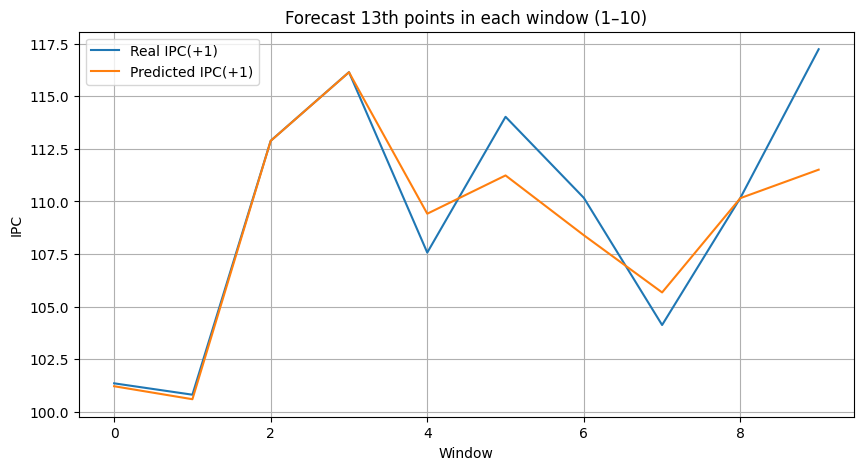

In [5]:

plt.figure(figsize=(10, 5))
plt.plot(true_vals, label='Real IPC(+1)')
plt.plot(pred_vals, label='Predicted IPC(+1)')
plt.title("Forecast 13th points in each window (1–10)")
plt.xlabel("Window")
plt.ylabel("IPC")
plt.legend()
plt.grid(True)
plt.savefig("forecast_comparison_lab5.png")
plt.show()

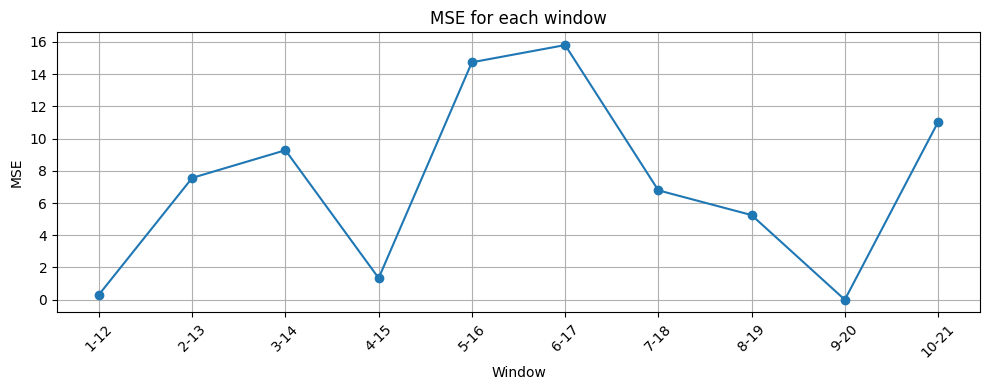

In [6]:

plt.figure(figsize=(10, 4))
plt.plot(df_results["Window"], df_results["MSE"], marker='o')
plt.xticks(rotation=45)
plt.title("MSE for each window")
plt.xlabel("Window")
plt.ylabel("MSE")
plt.grid(True)
plt.tight_layout()
plt.savefig("mse_comparison_lab5.png")
plt.show()